In [1]:
#
# PyOpenPNL example notebook / ODA Plus Dataset
# Copyright 2017, Tim O'Shea
#

In [2]:
import time, pprint
import bnwrap
t0 = time.time()
%matplotlib inline
bn = bnwrap.bn()

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
url = 'http://datacompass.lshtm.ac.uk/320/22/ODAplus_dataset_small_CSV.csv'
filename = 'odaplus.csv'
skip_lines = 0
bn.download_if_needed(url,filename)

In [4]:
# Show available fields in dataset
bn.dataset_fields(filename, skip_lines=0)
# Select which fields from the csv to use
bn.set_used_fields([0,2,7])
bn.load_dataset(150)

All Available Fields
0 year
1 donorcode
2 donorname
3 recipientcode
4 recipientname
5 RMNCH_code
6 purposecode
7 purposename
8 CH_Exp
9 MNH_Ex
10 RH_Exp
11 channelcode
12 channelname
13 Count of records
[(0, 'year'), (1, 'donorname'), (2, 'purposename')]
Node Cardinality:
{'donorname': 54, 'purposename': 143, 'year': 11}
Node Numeric:
{'donorname': False, 'purposename': False, 'year': True}


In [5]:
bn.to_numeric()

Structure Learning Time: 0.212902 (s) 
Learned Network
[[0 1 0]
 [0 0 0]
 [0 1 0]]
DAG Plot
Edges [(0, 1), (2, 1)]


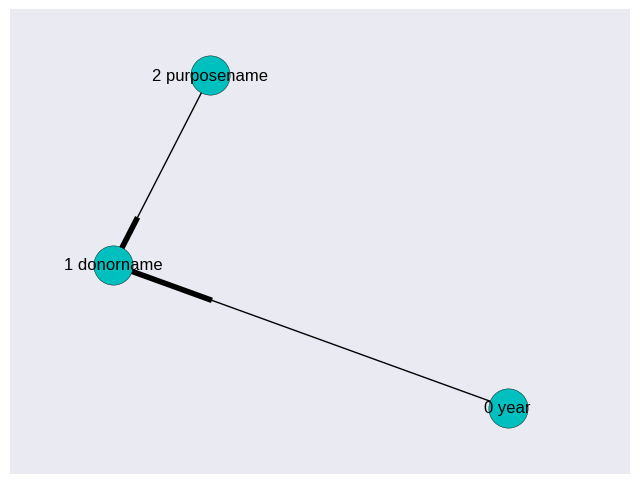

In [6]:
bn.fit_bn_structure()
print "Learned Network"
bn.plot_network()
print "Edges", bn.edges()

[[0 0 0]
 [1 0 0]
 [1 1 0]]
Using the following DAG Plot
[[0 0 0]
 [1 0 0]
 [1 1 0]]
DAG Plot


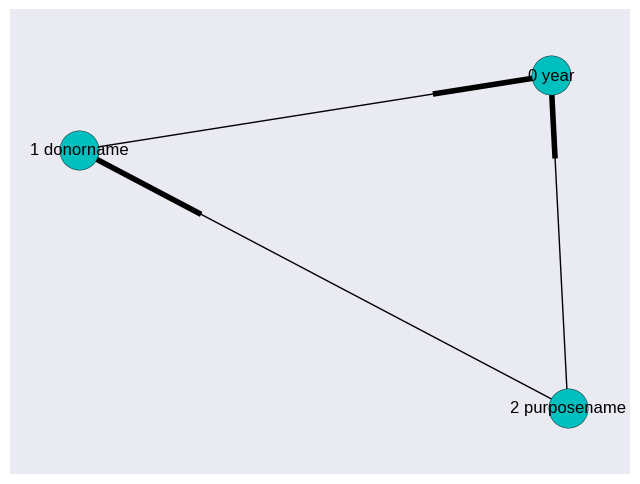

In [7]:

# Override with manually specified edges?
edges = [(1, 0), (2, 0), (2, 1)]
bn.define_network(edges)
print "Using the following DAG Plot"
bn.plot_network()


In [8]:

bn.topsort()
bn.create_bn()
bn.fit_bn_densities()


[[0 0 0]
 [1 0 0]
 [1 1 0]]
CPD Learning Time: 0.085530 (s) 


In [9]:
pprint.pprint(bn.node_vals)

{'donorname': ['Canada',
               'IFAD',
               'AfDF',
               'Italy',
               'Czech Republic',
               'AfDB',
               'BADEA',
               'Luxembourg',
               'France',
               'Global Fund',
               'Ireland',
               'OFID',
               'WFP',
               'Norway',
               'IDA',
               'IMF (Concessional Trust Funds)',
               'Australia',
               'Slovenia',
               'Iceland',
               'WHO',
               'Bill & Melinda Gates Foundation',
               'AsDB Special Funds',
               'GAVI',
               'Germany',
               'GEF',
               'UNFPA',
               'Belgium',
               'IDB Sp.Fund',
               'EU Institutions',
               'Spain',
               'Netherlands',
               'Estonia',
               'Denmark',
               'Poland',
               'Finland',
               'United States',
          

In [10]:
print "Node Indices: ", bn.node_indices()

Node Indices:  [(0, 'year'), (1, 'donorname'), (2, 'purposename')]


In [11]:
for t in [0,1]:
    bn.print_expr([t],{2:0})

Marginal variables:  ['year']
Evidence {'purposename': ''}
Probability expression P(year | purposename=)
Density [ 0.25  0.25  0.    0.25  0.25  0.    0.    0.    0.    0.    0.  ] 11
Inference time: 0.002296
Marginal variables:  ['donorname']
Evidence {'purposename': ''}
Probability expression P(donorname | purposename=)
Density [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 54
Inference time: 0.001971


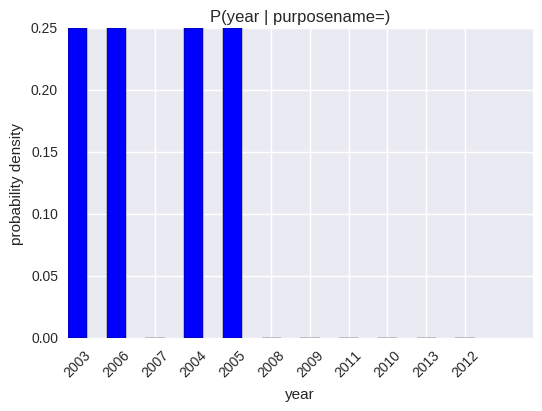

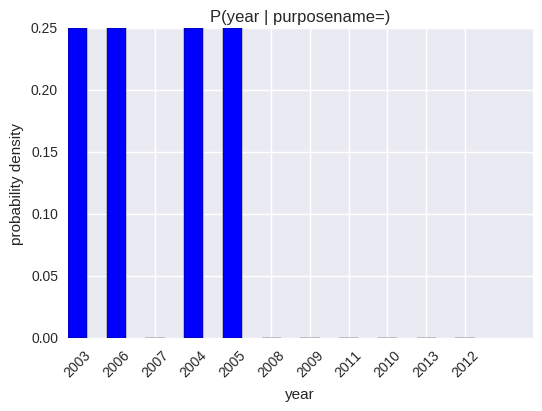

In [12]:
bn.plot_density_1d([0],{2:0},engine='pearl')
bn.plot_density_1d([0],{2:0},engine='jtree')

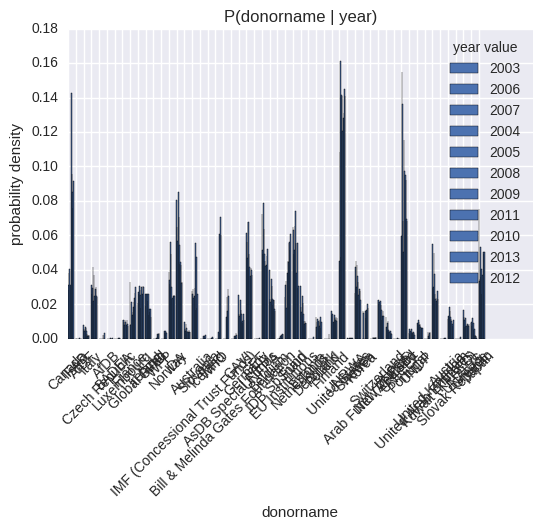

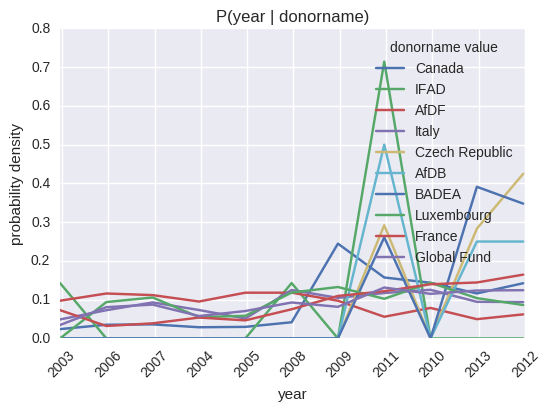

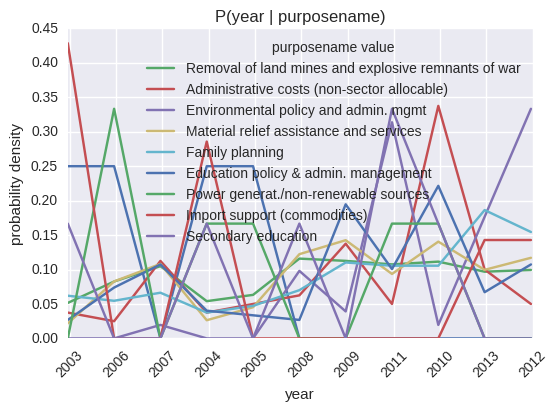

In [13]:
bn.plot_multidensity_1d([1], map(lambda x: {0:x}, range(len(bn.node_vals[bn.node_names[0]]))))
bn.plot_multidensity_1d([0], map(lambda x: {1:x}, range(10)), mode='line')
bn.plot_multidensity_1d([0], map(lambda x: {2:x}, range(10)), mode='line')

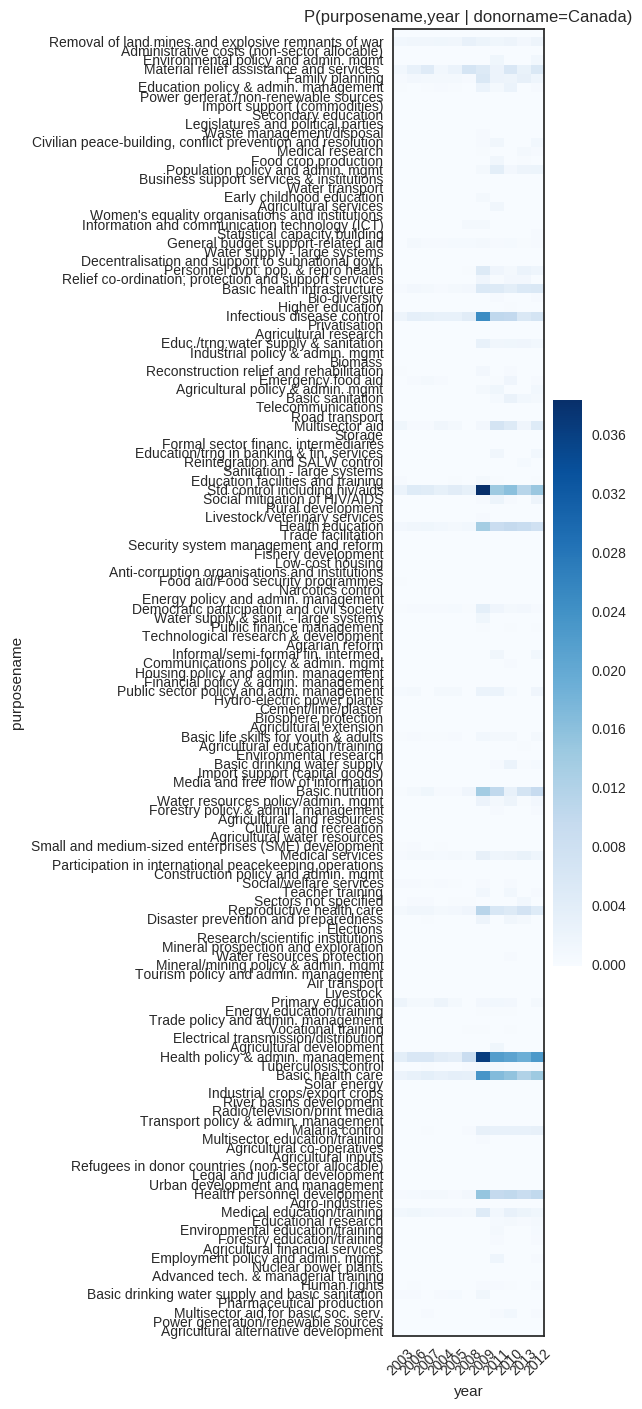

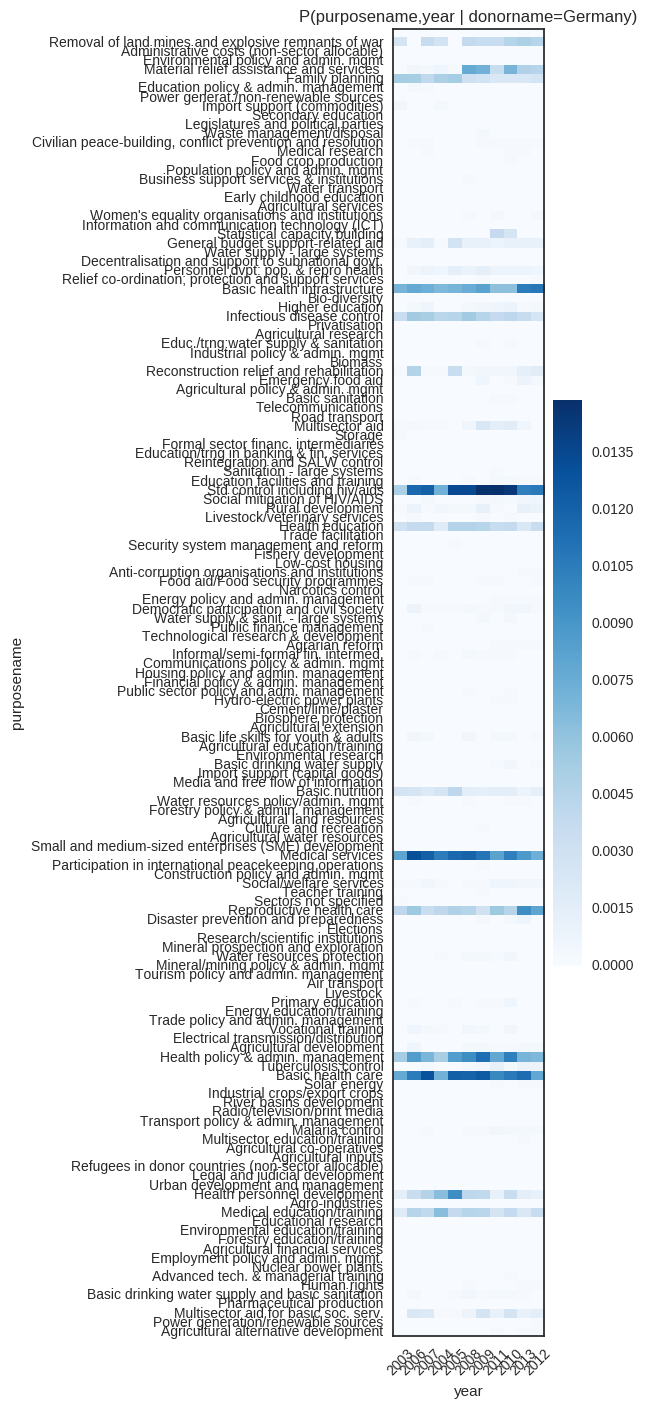

In [14]:
bn.plot_density_2d([2,0],{1:0}, figsize=(6,14))
bn.plot_density_2d([2,0],{1:23}, figsize=(6,14))

In [15]:
print "Notebook finished in %f seconds"%(time.time()-t0)

Notebook finished in 7.123125 seconds
